In [1]:
library(sna)


Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


Loading required package: network


‘network’ 1.18.1 (2023-01-24), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


sna: Tools for Social Network Analysis
Version 2.7-1 created on 2023-01-24.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




In [2]:
enron <- load("Enron.Rdata")
cat("The dataset contains:", enron)


The dataset contains: employeelist message recipientinfo referenceinfo

In [3]:
# Basic information about the employees
summary(employeelist)

# Basic information about the emails
summary(message)

# Basic information about the recipients
summary(recipientinfo)

# Sample of the employees
head(employeelist)

# Sample of the emails
head(message)

# Sample of the recipients
head(recipientinfo)


      eid          firstName           lastName           Email_id        
 Min.   :  1.00   Length:149         Length:149         Length:149        
 1st Qu.: 38.00   Class :character   Class :character   Class :character  
 Median : 75.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 75.07                                                           
 3rd Qu.:112.00                                                           
 Max.   :150.00                                                           
                                                                          
    Email2             Email3             EMail4             folder         
 Length:149         Length:149         Length:149         Length:149        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

      mid                               sender            date           
 Min.   :    52   jeff.dasovich@enron.com  :  6273   Min.   :1-05-30     
 1st Qu.: 88564   j.kaminski@enron.com     :  5838   1st Qu.:2000-12-01  
 Median :186421   kay.mann@enron.com       :  5100   Median :2001-05-21  
 Mean   :190260   sara.shackleton@enron.com:  4797   Mean   :1999-04-15  
 3rd Qu.:279962   tana.jones@enron.com     :  4437   3rd Qu.:2001-10-25  
 Max.   :404927   chris.germany@enron.com  :  3686   Max.   :2044-01-04  
                  (Other)                  :222628                       
                                         message_id       subject         
 <10000282.1075847198841.JavaMail.evans@thyme>:     1   Length:252759     
 <10000478.1075841161605.JavaMail.evans@thyme>:     1   Class :character  
 <1000097.1075860055721.JavaMail.evans@thyme> :     1   Mode  :character  
 <1000099.1075858574579.JavaMail.evans@thyme> :     1                     
 <1000115.1075852075775.JavaMail.

      rid               mid         rtype        
 Min.   :     67   Min.   :    52   BCC: 253713  
 1st Qu.: 718289   1st Qu.:105438   CC : 253735  
 Median :1515296   Median :198263   TO :1556994  
 Mean   :1543862   Mean   :196168                
 3rd Qu.:2309682   3rd Qu.:280673                
 Max.   :3242063   Max.   :404927                
                                                 
                       rvalue       
 no.address@enron.com     :  19198  
 jeff.dasovich@enron.com  :  11137  
 richard.shapiro@enron.com:  11015  
 steven.j.kean@enron.com  :  10873  
 james.d.steffes@enron.com:  10615  
 tana.jones@enron.com     :   9781  
 (Other)                  :1991823  

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
1,13,Marie,Heard,marie.heard@enron.com,,,,heard-m,NA
2,6,Mark,Taylor,mark.e.taylor@enron.com,mark.taylor@enron.com,e.taylor@enron.com,,taylor-m,Employee
3,19,Lindy,Donoho,lindy.donoho@enron.com,ldonoho@enron.com,,,donoho-l,Employee
4,115,Lisa,Gang,lisa.gang@enron.com,,,,gang-l,N/A
5,129,Jeffrey,Skilling,jeff.skilling@enron.com,jeffrey.skilling@enron.com,,,skilling-j,CEO
6,18,Lynn,Blair,lynn.blair@enron.com,lynnblair@enron.com,,,blair-l,Director


,mid,sender,date,message_id,subject
,<int>,<fct>,<date>,<fct>,<chr>
1,52,press.release@enron.com,2000-01-21,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES BUSINESS OVERVIEW AND GOALS FOR 2000
2,53,office.chairman@enron.com,2000-01-24,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!
3,54,office.chairman@enron.com,2000-01-24,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!
4,55,press.release@enron.com,2000-02-02,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER FINANCIAL WEB CONTENT
5,56,office.chairman@enron.com,2000-02-07,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking
6,57,foothi19@idt.net,2000-08-25,<31680362.1075863730221.JavaMail.evans@thyme>,WPTF Friday Credo Veritas Burrito


,rid,mid,rtype,rvalue
,<int>,<dbl>,<fct>,<fct>
1,67,52,TO,all.worldwide@enron.com
2,68,53,TO,all.downtown@enron.com
3,69,54,TO,all.enron-worldwide@enron.com
4,70,55,TO,all.worldwide@enron.com
5,71,56,TO,all_enron_north.america@enron.com
6,72,56,TO,ec.communications@enron.com


In [4]:
# select columns: mid, sender and date
senders <- message[, 1:3]

# select columns mid, to and rvalue
recipients <- recipientinfo[, 2:4]
transactional_data <- merge(x = senders, y = recipients, by = "mid", all = T)

head(transactional_data)


,mid,sender,date,rtype,rvalue
,<int>,<fct>,<date>,<fct>,<fct>
1,52,press.release@enron.com,2000-01-21,TO,all.worldwide@enron.com
2,53,office.chairman@enron.com,2000-01-24,TO,all.downtown@enron.com
3,54,office.chairman@enron.com,2000-01-24,TO,all.enron-worldwide@enron.com
4,55,press.release@enron.com,2000-02-02,TO,all.worldwide@enron.com
5,56,office.chairman@enron.com,2000-02-07,TO,all_enron_north.america@enron.com
6,56,office.chairman@enron.com,2000-02-07,TO,ec.communications@enron.com


In [5]:
# select email adresses of senders
sender_addresses <- transactional_data$sender

# select email adresses of recipients
recipient_addresses <- transactional_data$rvalue

# get unique addresses
unique_addresses <- unique(c(
  sender_addresses,
  recipient_addresses
))

cat("Number of unique addresses:", length(unique_addresses))


Number of unique addresses: 75416

In [6]:
unique_employee_address <- unique(c(
  employeelist$Email_id,
  employeelist$Email2,
  employeelist$Email3,
  employeelist$EMail4
))

cat("Number of unique employee addresses:", length(unique_employee_address))


Number of unique employee addresses: 298

In [7]:
sender_recipient <- unique(transactional_data[, c(2, 5, 3)])
employee_transactional_data <- sender_recipient[sender_recipient[, 1] %in% unique_employee_address, ]

transactional_to_adjacency <- function(data, employee_addresses) {
  # Create an adjacency matrix from transactional data

  n <- length(employee_addresses)
  A <- matrix(0, n, n)
  colnames(A) <- employee_addresses

  # iterate over addresses
  for (sender in employee_addresses) {
    idx <- which(employee_addresses == sender)
    # find the mail exchange recipients
    exchanges <- data[
      which(data[, 1] == sender),
    ]

    # Fill the appropriate entries in the adjacency matrix
    for (recipient in exchanges[, 2]) {
      idy <- which(employee_addresses == recipient)
      A[idx, idy] <- 1
    }
  }

  return(list(employee_addresses = employee_addresses, A = A))
}


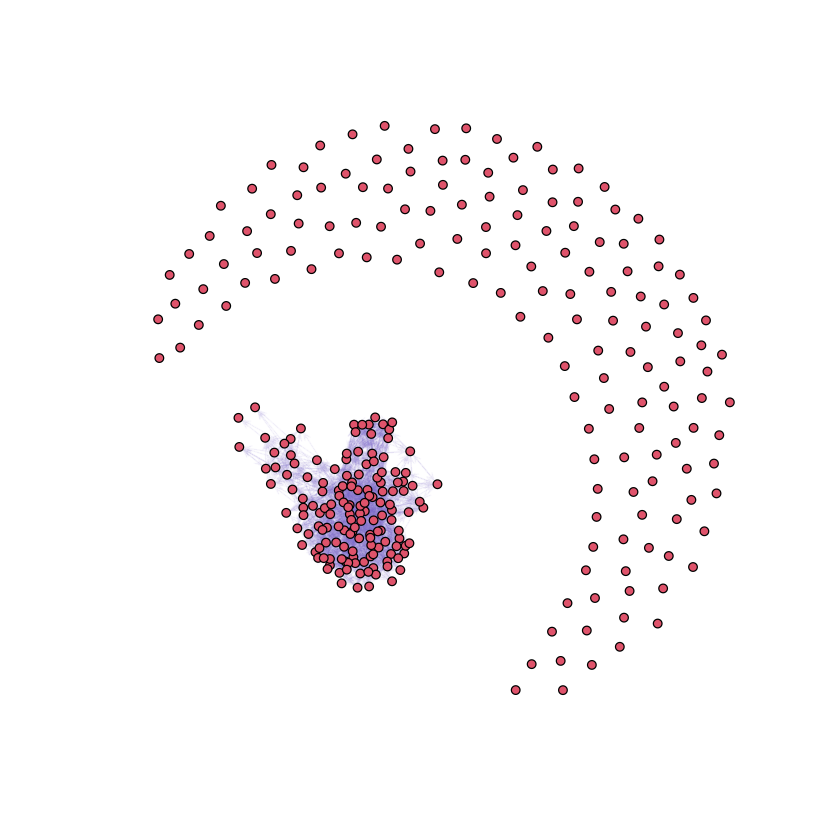

In [8]:
A <- transactional_to_adjacency(
  employee_transactional_data,
  unique_employee_address
)

gplot(A$A, edge.col = "#7d72c60d")


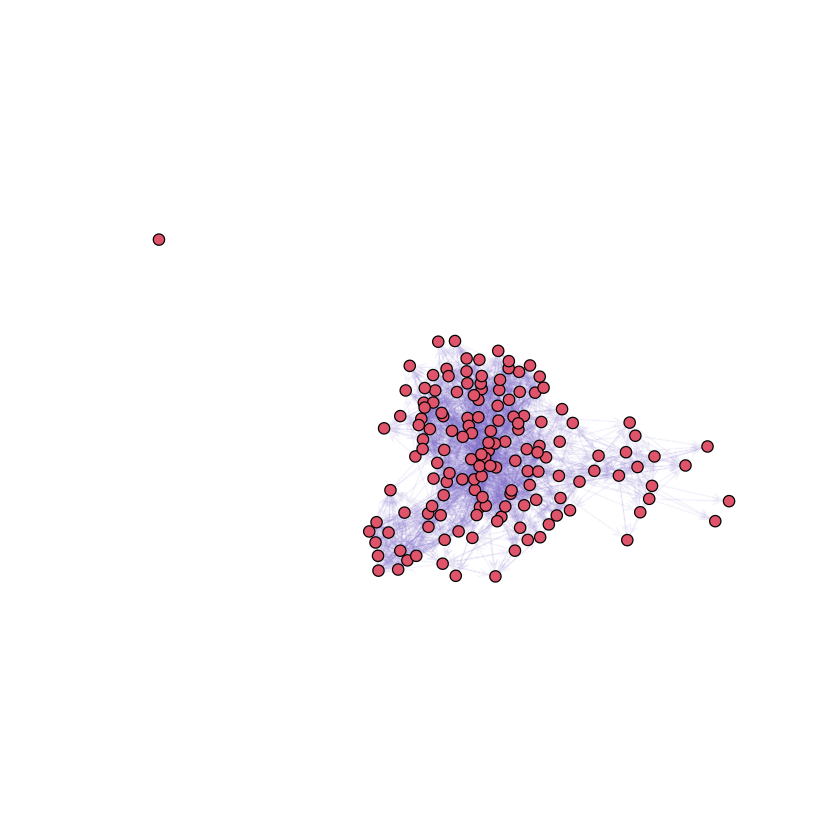

In [9]:
remove_empty_entries <- function(A) {
  # Find nodes with both empty rows and columns and remove them
  emptycols <- which(colSums(A) == 0)
  emptyrows <- which(rowSums(A) == 0)
  empty_idx <- Reduce(intersect, list(emptyrows, emptycols))
  A[-empty_idx, -empty_idx]
}

A_filled <- remove_empty_entries(A$A)
gplot(A_filled, edge.col = "#7d72c60d")


Loading required package: ergm


‘ergm’ 4.4.0 (2023-01-26), part of the Statnet Project
* ‘news(package="ergm")’ for changes since last version
* ‘citation("ergm")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


‘ergm’ 4 is a major update that introduces some backwards-incompatible
changes. Please type ‘news(package="ergm")’ for a list of major
changes.



Attaching package: ‘ergm’


The following object is masked from ‘package:statnet.common’:

    snctrl







 Variational Bayes Latent Position Cluster Model for networks. 
VBLPCM Version 2.4.9 Created on 2023-03-22
 Created and maintained by  Michael Salter-Townshend


For citation information type 'citation("VBLPCM")'


Type 'help(VBLPCM)' to get started.


Some worked examples are given by 'example(VBLPCM)' 




1 / 30 iterations
2 / 30 iterations
3 / 30 iterations
4 / 30 iterations
5 / 30 iterations
6 / 30 iterations
7 / 30 iterations
8 / 30 iterations
9 / 30 iterations
10 / 30 iterations
11 / 30 iterations
12 / 30 iterations
13 / 30 iterations
14 / 30 iterations
15 / 30 iterations
16 / 30 iterations
17 / 30 iterations
18 / 30 iterations
19 / 30 iterations
20 / 30 iterations
21 / 30 iterations
22 / 30 iterations
23 / 30 iterations
24 / 30 iterations
25 / 30 iterations
26 / 30 iterations
27 / 30 iterations
28 / 30 iterations
29 / 30 iterations
30 / 30 iterations
KL distance to true posterior is  -11186.93 + constant 


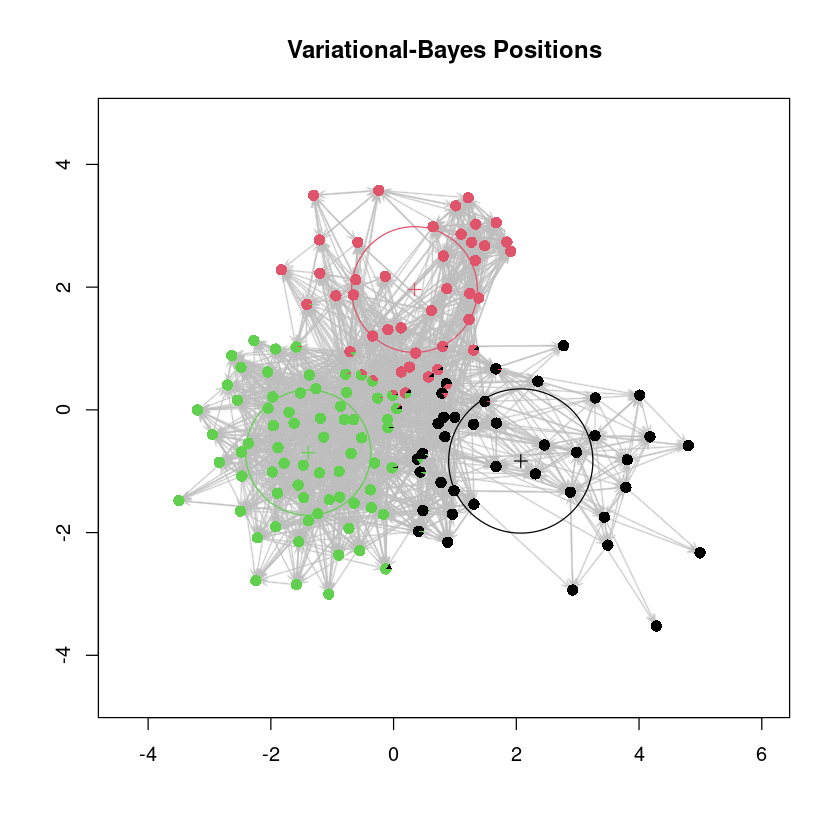

In [10]:
out <- vblpcmfit(vblpcmstart(as.network(A_filled), G = 3, model = "plain", LSTEPS = 1e3), STEPS = 30)
plot(out)


1 / 30 iterations
2 / 30 iterations
3 / 30 iterations
4 / 30 iterations
5 / 30 iterations
6 / 30 iterations
7 / 30 iterations
8 / 30 iterations
9 / 30 iterations
10 / 30 iterations
11 / 30 iterations
12 / 30 iterations
13 / 30 iterations
14 / 30 iterations
15 / 30 iterations
16 / 30 iterations
17 / 30 iterations
18 / 30 iterations
19 / 30 iterations
20 / 30 iterations
21 / 30 iterations
22 / 30 iterations
23 / 30 iterations
24 / 30 iterations
25 / 30 iterations
26 / 30 iterations
27 / 30 iterations
28 / 30 iterations
29 / 30 iterations
30 / 30 iterations
KL distance to true posterior is  -11313.53 + constant 


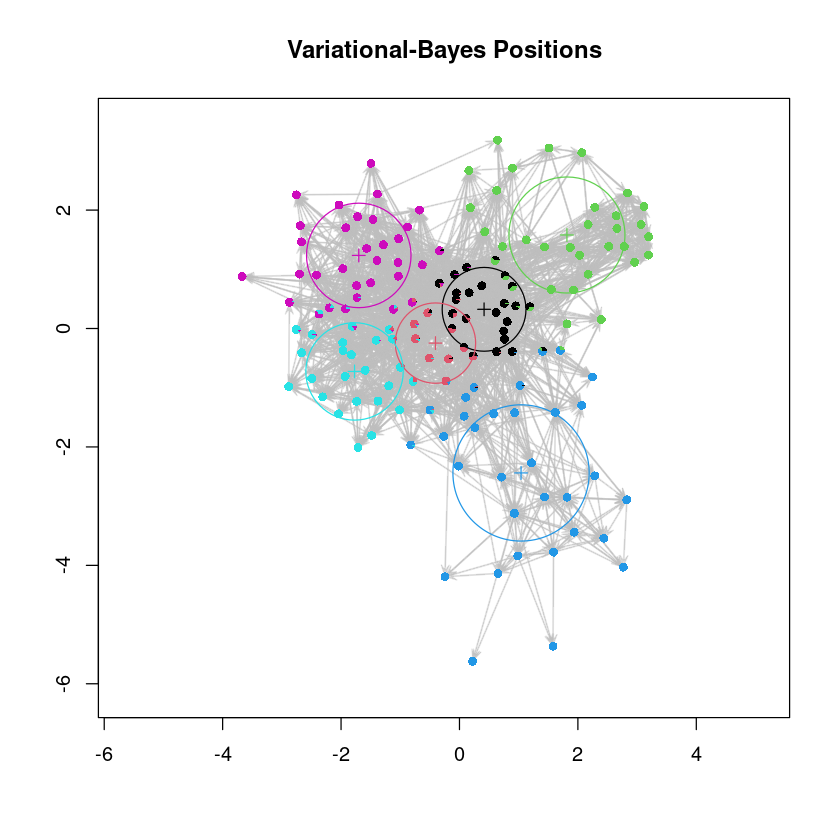

In [14]:
res <- vblpcmfit(vblpcmstart(as.network(A_filled), G = 6, model = "plain", LSTEPS = 1e3), STEPS = 30)
plot(res)


1 / 30 iterations
2 / 30 iterations
3 / 30 iterations
4 / 30 iterations
5 / 30 iterations
6 / 30 iterations
7 / 30 iterations
8 / 30 iterations
9 / 30 iterations
10 / 30 iterations
11 / 30 iterations
12 / 30 iterations
13 / 30 iterations
14 / 30 iterations
15 / 30 iterations
16 / 30 iterations
17 / 30 iterations
18 / 30 iterations
19 / 30 iterations
20 / 30 iterations
21 / 30 iterations
22 / 30 iterations
23 / 30 iterations
24 / 30 iterations
25 / 30 iterations
26 / 30 iterations
27 / 30 iterations
28 / 30 iterations
29 / 30 iterations
30 / 30 iterations
KL distance to true posterior is  -11355.62 + constant 


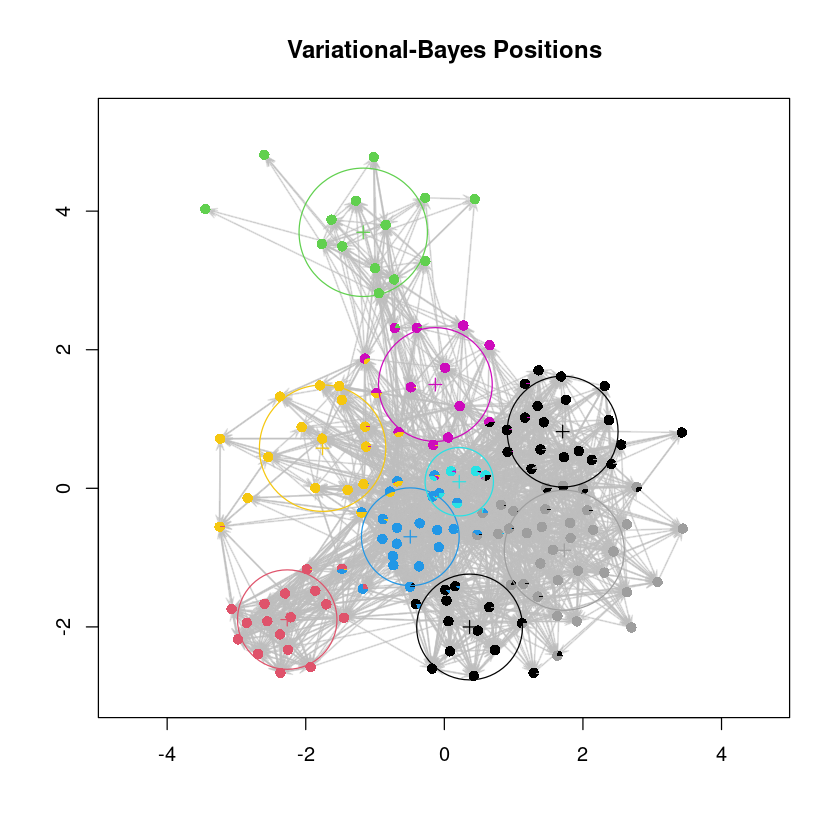

In [15]:
res <- vblpcmfit(vblpcmstart(as.network(A_filled), G = 9, model = "plain", LSTEPS = 1e3), STEPS = 30)
plot(res)
